## Dataset: F1 Database from ERGAST (Regression Problem) 

## Table of Contents
#### 1. [Background](#part1)
#### 2. [Problem Statement](#part2)
#### 3. [Project Objectives](#part3)
#### 4. [Primary questions](#part4)
#### 5. [Datasets](#part5) 
#### 6. [Step 1: Load and Explore the data](#part6)  
   - [6.1 Importing Data with Pandas](#part6.1)
   - [6.2 Extracting year from unstructured date fields](#part6.2)
   - [6.3 Extracting year from unstructured text data](#part6.3)

#### 7. [Step 2: Data Wrangling on multiple tables](#part7)
   - [7.1 Merging different tables together](#part7.1)
   - [7.2 Feature Engineering using Mathematical Calculations](#part7.2) 
   - [7.3 Data Exploration and Visualization (Exploratory Data Analysis - EDA)](#part7.3)
   
#### 8. [Step 3: Data Cleansing and Transformation](#part8)
   - [8.1 Descriptive Statistics](#part8.1)
   - [8.2 Correlation](#part8.2)
   - [8.3 Univariate Analysis - Numerical variables](#part8.3)

## Background <a id="part1"></a>
Ergast.com is a webservice that provides a database of Formula 1 races, starting from the 1950 season until today. 

### Source & Acknowledgements

The dataset, downloaded from http://ergast.com/mrd/db/#csv, includes information such as the time taken in each lap, the time taken for pit stops, the performance in the qualifying rounds etc. of all Formula 1 races.

## Problem Statement <a id="part2"></a>

How to implement a linear regression model for predicting number of points achieved by a driver in F1 race

## Project Objectives <a id="part3"></a>

To extract data from a database, explore the data and formulate a prediction problem

To create a tabular data table from multiple tables based on the formulated problem

To wrangle and prepare the data ready for modeling, use the prepared data to build and evaluate a simple machine learning model

To document the process, analysis, comparison and findings

## Primary questions <a id="part4"></a>

Who (driver) is the winner for each year's Formula One Championship?

Which team (constructor) is the winner for each year's Formula One Championship?

Who (driver) has the most Championship titles till date?

Who (driver) has the most number of pole positions (grid = 1) till date?

Who (driver) has the most race wins (position = 1) till date?

How does the different grid (pole positions) affect points achievement?

How does the different rankings of fastest laps affect points achievement?

Does race age (young or old) impact on points achievement?

Does location of race impact points achievement?

## Datasets Provided <a id="part5"></a>

1. circuits;
2. constructorResults;
3. constructorStandings;
4. constructors (used here);
5. driverStandings;
6. drivers (used here);
7. lapTimes;
8. pitStops;
9. qualifying;
10. races (used here);
11. results (used here);
12. seasons;
13. status (used here).

In [1]:
# import the pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to show all the columns of the dataframe in the notebeook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")

### Step 1: Load and Explore the Data <a id="part6"></a>

### Importing Data with Pandas <a id="part6.1"></a>

In [2]:
# 1st Dataset "constructors_mod"

df_constructor = pd.read_csv('./raw_data/constructors.csv')
display(df_constructor.head(10))

# Drop the columns 'url', 'constructorRef', 'nationality' which are not useful

df_constructor.drop(columns = ['url', 'constructorRef', 'nationality'], axis=1, inplace=True)
df_constructor

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Prix_Engineering
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formula_One
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Force_India


,constructorId,name
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso
...,...,...
206,209,Manor Marussia
207,210,Haas F1 Team
208,211,Racing Point
209,213,AlphaTauri


In [3]:
# Basic summary of the dataset

print(df_constructor.shape) # 211 rows, 2 columns
print(df_constructor.size) # 422 observations in total
print(df_constructor.dtypes) # 1 categorical column and 1 numeric column

(211, 2)
422
constructorId     int64
name             object
dtype: object


In [4]:
# 2nd Dataset "results_mod"

df_result = pd.read_csv('./raw_data/results.csv')
df_result.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3


In [5]:
# Basic summary of the dataset

print(df_result.shape) # 25,399 rows, 18 columns
print(df_result.size) # 457,182 observations in total
print(df_result.dtypes) # 9 categorical columns (wrong datatype because of \N: should be int64) and 9 numeric columns

(25900, 18)
466200
resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object


### Extracting year from unstructured date fields <a id="part6.2"></a>

In [6]:
# 3rd Dataset "drivers_mod"

df_driver = pd.read_csv('./raw_data/drivers.csv')
display(df_driver.head(10))

# Extract year in unstructured datetime data 'dob'  

df_driver['yob'] = pd.to_datetime(df_driver['dob']).dt.year

# Apply mathematical Calculations to Features such as addition of 'forename' and 'surname' with an underscore

df_driver['drivername'] = df_driver['forename'] + '_' + df_driver['surname']

# Drop the column 'url', 'forename', 'surname', 'nationality', 'dob', 'driverRef' which are no longer useful

df_driver.drop(columns = ['url', 'code', 'forename', 'surname', 'nationality', 'dob', 'driverRef'], axis=1, inplace=True)
df_driver

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,\N,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bourdais
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C3%B6nen
8,9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,\N,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock


,driverId,number,yob,drivername
0,1,44,1985,Lewis_Hamilton
1,2,\N,1977,Nick_Heidfeld
2,3,6,1985,Nico_Rosberg
3,4,14,1981,Fernando_Alonso
4,5,\N,1981,Heikki_Kovalainen
...,...,...,...,...
852,854,47,1999,Mick_Schumacher
853,855,24,1999,Guanyu_Zhou
854,856,21,1995,Nyck_de Vries
855,857,81,2001,Oscar_Piastri


In [7]:
# Basic summary of the dataset

print(df_driver.shape) # 854 rows, 4 columns
print(df_driver.size) # 3416 observations in total
print(df_driver.dtypes) # 2 categorical columns and 2 numeric columns

(857, 4)
3428
driverId       int64
number        object
yob            int32
drivername    object
dtype: object


### Extracting year from unstructured text data <a id="part6.3"></a>

In [8]:
# 4th Dataset "races_mod"

df_circuit = pd.read_csv('./raw_data/races.csv')
display(df_circuit.head(10))

# Extract year in unstructured data 'url text'

df_circuit['year'] = df_circuit['url'].str.extract('(\d+)')

df_circuit

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
5,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
6,7,2009,7,5,Turkish Grand Prix,2009-06-07,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
7,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
8,9,2009,9,20,German Grand Prix,2009-07-12,12:00:00,http://en.wikipedia.org/wiki/2009_German_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
9,10,2009,10,11,Hungarian Grand Prix,2009-07-26,12:00:00,http://en.wikipedia.org/wiki/2009_Hungarian_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_States_Grand_Prix,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City_Grand_Prix,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Paulo_Grand_Prix,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_Grand_Prix,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [9]:
# Display all the rows that have Null values

display(df_circuit[pd.isnull(df_circuit).any(axis=1)])

# Replace NaN value with 2021 in the year column

df_circuit['year'] = df_circuit['year'].replace(np.nan, 2021)

# Check to see if the new value 2021 is in index 1055

df_circuit.loc[1055]

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time


raceId                                                                1071
year                                                                  2021
round                                                                   19
circuitId                                                               18
name                                                  São Paulo Grand Prix
date                                                            2021-11-14
time                                                              17:00:00
url            http://en.wikipedia.org/wiki/2021_S%C3%A3o_Paulo_Grand_Prix
fp1_date                                                        2021-11-12
fp1_time                                                                \N
fp2_date                                                        2021-11-13
fp2_time                                                                \N
fp3_date                                                                \N
fp3_time                 

In [10]:
# Display the row where raceID = 1035. Notice that the year is 70 in the 'year' column which should not be the case

display(df_circuit.loc[df_circuit['raceId'] == 1035])

# Replace year 70 to be year 2020 and check again

df_circuit['year'] = df_circuit['year'].replace(['70'], '2020')
df_circuit.loc[1022]

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1022,1035,70,5,9,70th Anniversary Grand Prix,2020-08-09,13:10:00,http://en.wikipedia.org/wiki/70th_Anniversary_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


raceId                                                             1035
year                                                               2020
round                                                                 5
circuitId                                                             9
name                                        70th Anniversary Grand Prix
date                                                         2020-08-09
time                                                           13:10:00
url            http://en.wikipedia.org/wiki/70th_Anniversary_Grand_Prix
fp1_date                                                             \N
fp1_time                                                             \N
fp2_date                                                             \N
fp2_time                                                             \N
fp3_date                                                             \N
fp3_time                                                        

In [11]:
# convert the year column datatype to integer

df_circuit['year'] = df_circuit['year'].astype(int)

# Drop the column 'url', 'time', 'date' which are no longer useful

df_circuit.drop(columns = ['url', 'time', 'date'], axis=1, inplace=True)
df_circuit

,raceId,year,round,circuitId,name,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [12]:
# Basic summary of the dataset

print(df_circuit.shape) # 1,080 rows, 5 columns
print(df_circuit.size) # 5,400 observations in total
print(df_circuit.dtypes) # 1 categorical column and 4 numeric columns

(1102, 15)
16530
raceId          int64
year            int32
round           int64
circuitId       int64
name           object
fp1_date       object
fp1_time       object
fp2_date       object
fp2_time       object
fp3_date       object
fp3_time       object
quali_date     object
quali_time     object
sprint_date    object
sprint_time    object
dtype: object


In [13]:
# 5th Dataset "status_mod"

df_status = pd.read_csv('./raw_data/status.csv')
df_status.head(10)

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
5,6,Gearbox
6,7,Transmission
7,8,Clutch
8,9,Hydraulics
9,10,Electrical


In [14]:
# Basic summary of the dataset

print(df_status.shape) # 137 rows, 2 columns
print(df_status.size) # 274 observations in total
print(df_status.dtypes) # 1 categorical column and 1 numeric column

(139, 2)
278
statusId     int64
status      object
dtype: object


### Step 2: Data Wrangling on multiple tables <a id="part7"></a>

### Merging different tables together <a id="part7.1"></a>

In [15]:
# joining df_result with df_driver by column driverID, using inner join

df_result1 = pd.merge(df_result, df_driver, on='driverId')

# joining df_result1 with df_circuit by column raceID, using inner join

df_result2 = pd.merge(df_result1, df_circuit, on='raceId')

# joining df_result2 with df_constructor by column constructorID, using inner join

df_result3 = pd.merge(df_result2, df_constructor, on='constructorId')

# joining df_result3 with df_status by column statusID, using inner join

df_race_finished = pd.merge(df_result3, df_status, on='statusId')
df_race_finished

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,number_y,yob,drivername,year,round,circuitId,name_x,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,name_y,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,44,1985,Lewis_Hamilton,2008,1,1,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
1,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,\N,1981,Heikki_Kovalainen,2008,1,1,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
2,27,19,1,1,22,9,5,5,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1,44,1985,Lewis_Hamilton,2008,2,2,Malaysian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
3,25,19,5,1,23,8,3,3,3,6.0,56,+38.450,5517005,19,7,1:35.922,208.031,1,\N,1981,Heikki_Kovalainen,2008,2,2,Malaysian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
4,49,20,5,1,23,5,5,5,5,4.0,57,+26.789,5493759,49,1,1:33.193,209.062,1,\N,1981,Heikki_Kovalainen,2008,3,3,Bahrain Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895,17224,710,346,181,36,18,13,13,13,0.0,55,\N,\N,\N,\N,\N,\N,113,\N,1936,Jo_Siffert,1964,2,39,Dutch Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Brabham-BRM,+25 Laps
25896,17103,704,346,181,28,10,13,13,13,0.0,55,\N,\N,\N,\N,\N,\N,113,\N,1936,Jo_Siffert,1965,6,39,Dutch Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Brabham-BRM,+25 Laps
25897,17820,736,347,95,11,9,13,13,13,0.0,79,\N,\N,\N,\N,\N,\N,120,\N,1930,Jo_Bonnier,1962,8,46,United States Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Porsche,+21 Laps
25898,19315,803,547,87,28,20,15,15,15,0.0,44,\N,\N,\N,\N,\N,\N,125,\N,1918,Horace_Gould,1954,5,9,British Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Cooper,+46 Laps


In [16]:
# Drop the columns 'resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'positionText', 'positionOrder', 'time', 'milliseconds', 'fastestLapTime', 'statusId', 'number_y' and 'circuitId' which are not useful

df_race_finished.drop(columns = ['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'positionText', 'positionOrder', 'time', 'milliseconds', 'fastestLapTime', 'statusId', 'number_y', 'circuitId'], axis=1, inplace=True)
df_race_finished

,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,yob,drivername,year,round,name_x,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,name_y,status
0,1,1,10.0,58,39,2,218.300,1985,Lewis_Hamilton,2008,1,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
1,3,5,4.0,58,43,1,218.385,1981,Heikki_Kovalainen,2008,1,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
2,9,5,4.0,56,53,3,209.033,1985,Lewis_Hamilton,2008,2,Malaysian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
3,8,3,6.0,56,19,7,208.031,1981,Heikki_Kovalainen,2008,2,Malaysian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
4,5,5,4.0,57,49,1,209.062,1981,Heikki_Kovalainen,2008,3,Bahrain Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895,18,13,0.0,55,\N,\N,\N,1936,Jo_Siffert,1964,2,Dutch Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Brabham-BRM,+25 Laps
25896,10,13,0.0,55,\N,\N,\N,1936,Jo_Siffert,1965,6,Dutch Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Brabham-BRM,+25 Laps
25897,9,13,0.0,79,\N,\N,\N,1930,Jo_Bonnier,1962,8,United States Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Porsche,+21 Laps
25898,20,15,0.0,44,\N,\N,\N,1918,Horace_Gould,1954,5,British Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Cooper,+46 Laps


In [17]:
# rename the columns accordingly
df_race_finished.rename(columns={'name_x': 'location', 'name_y': 'constructorname'}, inplace=True)
df_race_finished

,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,yob,drivername,year,round,location,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorname,status
0,1,1,10.0,58,39,2,218.300,1985,Lewis_Hamilton,2008,1,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
1,3,5,4.0,58,43,1,218.385,1981,Heikki_Kovalainen,2008,1,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
2,9,5,4.0,56,53,3,209.033,1985,Lewis_Hamilton,2008,2,Malaysian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
3,8,3,6.0,56,19,7,208.031,1981,Heikki_Kovalainen,2008,2,Malaysian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
4,5,5,4.0,57,49,1,209.062,1981,Heikki_Kovalainen,2008,3,Bahrain Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895,18,13,0.0,55,\N,\N,\N,1936,Jo_Siffert,1964,2,Dutch Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Brabham-BRM,+25 Laps
25896,10,13,0.0,55,\N,\N,\N,1936,Jo_Siffert,1965,6,Dutch Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Brabham-BRM,+25 Laps
25897,9,13,0.0,79,\N,\N,\N,1930,Jo_Bonnier,1962,8,United States Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Porsche,+21 Laps
25898,20,15,0.0,44,\N,\N,\N,1918,Horace_Gould,1954,5,British Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Cooper,+46 Laps


### Feature Engineer 'race_age' column using Mathematical calculations  <a id="part7.2"></a>

In [18]:
# Applying Mathematical substrations between features 'year' and 'yob' to derive the race_age of the driver

df_race_finished['race_age'] = df_race_finished['year'] - df_race_finished['yob']
df_race_finished.drop(columns = ['yob'], axis=1, inplace=True)
df_race_finished

,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,year,round,location,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorname,status,race_age
0,1,1,10.0,58,39,2,218.300,Lewis_Hamilton,2008,1,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished,23
1,3,5,4.0,58,43,1,218.385,Heikki_Kovalainen,2008,1,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished,27
2,9,5,4.0,56,53,3,209.033,Lewis_Hamilton,2008,2,Malaysian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished,23
3,8,3,6.0,56,19,7,208.031,Heikki_Kovalainen,2008,2,Malaysian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished,27
4,5,5,4.0,57,49,1,209.062,Heikki_Kovalainen,2008,3,Bahrain Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895,18,13,0.0,55,\N,\N,\N,Jo_Siffert,1964,2,Dutch Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Brabham-BRM,+25 Laps,28
25896,10,13,0.0,55,\N,\N,\N,Jo_Siffert,1965,6,Dutch Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Brabham-BRM,+25 Laps,29
25897,9,13,0.0,79,\N,\N,\N,Jo_Bonnier,1962,8,United States Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Porsche,+21 Laps,32
25898,20,15,0.0,44,\N,\N,\N,Horace_Gould,1954,5,British Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Cooper,+46 Laps,36


In [19]:
# Basic summary of the dataset

print(df_race_finished.shape) # 25,399 rows, 14 columns
print(df_race_finished.size) # 355,586 observations in total
print(df_race_finished.dtypes) # 8 categorical columns ('position', 'fastestLap', 'rank', 'fastestLapSpeed' 
                                                # variables incorrect, should be numerical) and 6 numeric columns

(25900, 24)
621600
grid                 int64
position            object
points             float64
laps                 int64
fastestLap          object
rank                object
fastestLapSpeed     object
drivername          object
year                 int32
round                int64
location            object
fp1_date            object
fp1_time            object
fp2_date            object
fp2_time            object
fp3_date            object
fp3_time            object
quali_date          object
quali_time          object
sprint_date         object
sprint_time         object
constructorname     object
status              object
race_age             int32
dtype: object


In [20]:
# show the info of dataset

df_race_finished.info() # there are no columns with missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25900 entries, 0 to 25899
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grid             25900 non-null  int64  
 1   position         25900 non-null  object 
 2   points           25900 non-null  float64
 3   laps             25900 non-null  int64  
 4   fastestLap       25900 non-null  object 
 5   rank             25900 non-null  object 
 6   fastestLapSpeed  25900 non-null  object 
 7   drivername       25900 non-null  object 
 8   year             25900 non-null  int32  
 9   round            25900 non-null  int64  
 10  location         25900 non-null  object 
 11  fp1_date         25900 non-null  object 
 12  fp1_time         25900 non-null  object 
 13  fp2_date         25900 non-null  object 
 14  fp2_time         25900 non-null  object 
 15  fp3_date         25900 non-null  object 
 16  fp3_time         25900 non-null  object 
 17  quali_date  

### Data Exploration and Visualization (Exploratory Data Analysis - EDA)  <a id="part7.3"></a>

### Driver's Championship ranking by season

In [21]:
# Create a user-defined function championship_driver(year) that shows the total points accumulated by each driver 
# in a given season. Based on the highest total points we can derive the winner of the championship in a particular year

def championship_driver(year):
    """returns the total points for a driver in a particular season"""
    # Create a column named "total_points" to sum up the number of points obtained by each driver
    total_points = df_race_finished[(df_race_finished['year']== year)].groupby('drivername')['points'].sum().reset_index()
    
    # Sort total_points in descending order
    total_points = total_points.sort_values(by=['points'], ascending=False)
    
    # Get top 20 results based on highest number of total points
    total_points = total_points[0:20]
    
    # Show top 20 drivers
    drivers = total_points.index
    total_points.plot(kind = 'bar', x='drivername', y='points', figsize=(12,6), title = f"Driver´s championship ranking of {year}")

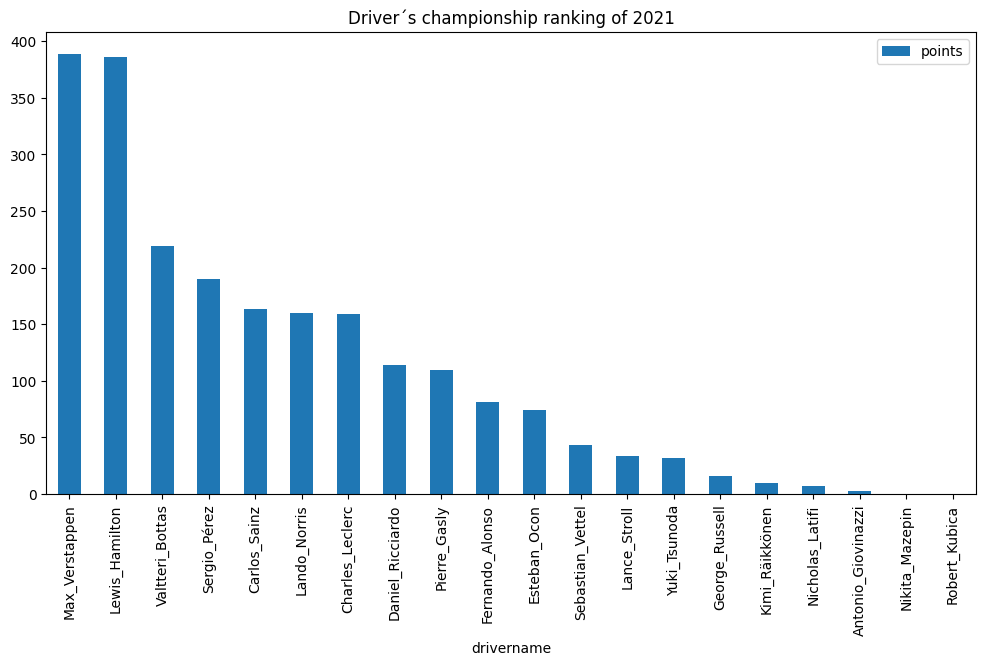

In [22]:
# choose the year to show the ranking between 2004 - 2021
championship_driver(2021) # Max Verstappen is the winner

### Constructor's Championship ranking by season

In [23]:
# Create a user-defined function championship_constructor(year) that shows the total points accumulated by each driver 
# in a given season. Based on the highest total points we can derive the winner of the championship in a particular year.

def championship_constructor(year):
    """returns the total points for a constructor in a particular season"""
    # Create a column named "total_points" to sum up the number of points obtained by each constructor
    total_points = df_race_finished[(df_race_finished['year']== year)].groupby('constructorname')['points'].sum().reset_index()
    
    # Sort total_points in descending order
    total_points = total_points.sort_values(by=['points'],ascending=False)
    
    # Get top 10 results based on highest number of total points
    total_points = total_points[0:10]
    
    # Get top 10 constructors
    drivers = total_points.index
    total_points.plot(kind = 'bar', x='constructorname', y='points', figsize=(12,6), title = f"Constructor´s championship ranking of {year}")

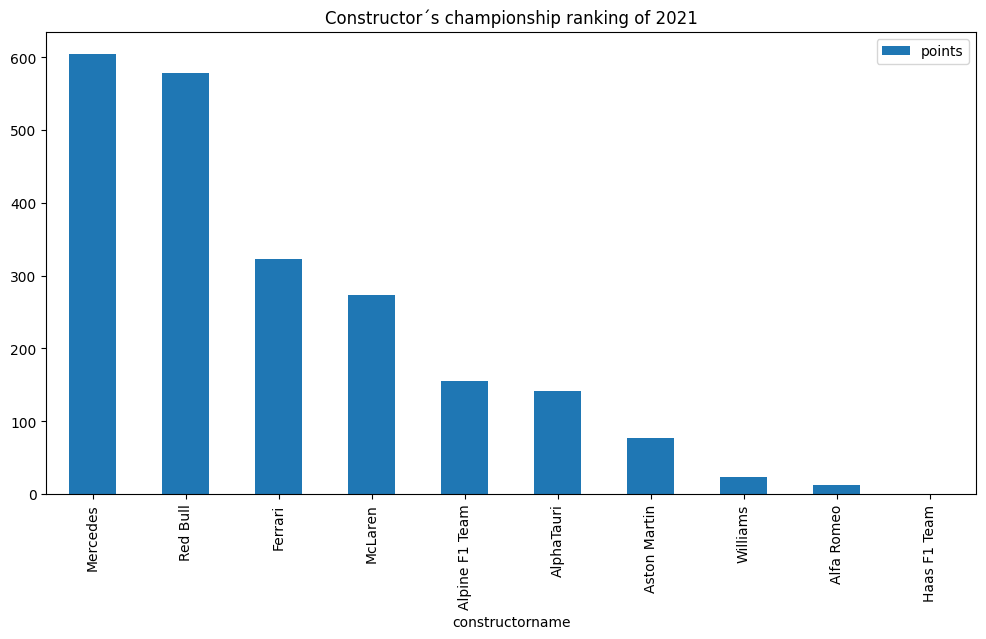

In [24]:
# choose the year to show the ranking between 2004 - 2021
championship_constructor(2021) # Mercedes is the winner

### Drivers with most Championship titles: Lewis Hamilton (7) and Michael Schumacher (7)

In [25]:
# Create a column named "sum_driver" to sum up the number of points obtained by each driver in each year

sum_driver = df_race_finished.groupby(['year','drivername'])['points'].sum().reset_index()

# Find the maximum number of points obtained by each driver and assign it to a new variable 'champions' for each year

champions = sum_driver.loc[sum_driver.reset_index().groupby(['year'])['points'].idxmax()]

# Count the frequency in which the driver obtain the maximum points for each year 

champions = champions['drivername'].value_counts().reset_index()

# Rename the columns as 'driver' and 'titles'

champions.rename(columns={'index':'drivername','count':'titles'}, inplace = True)

# Get top 20 results based on maximum points

champions = champions[0:20]

<Axes: title={'center': 'Drivers with more Championship titles'}, xlabel='drivername'>

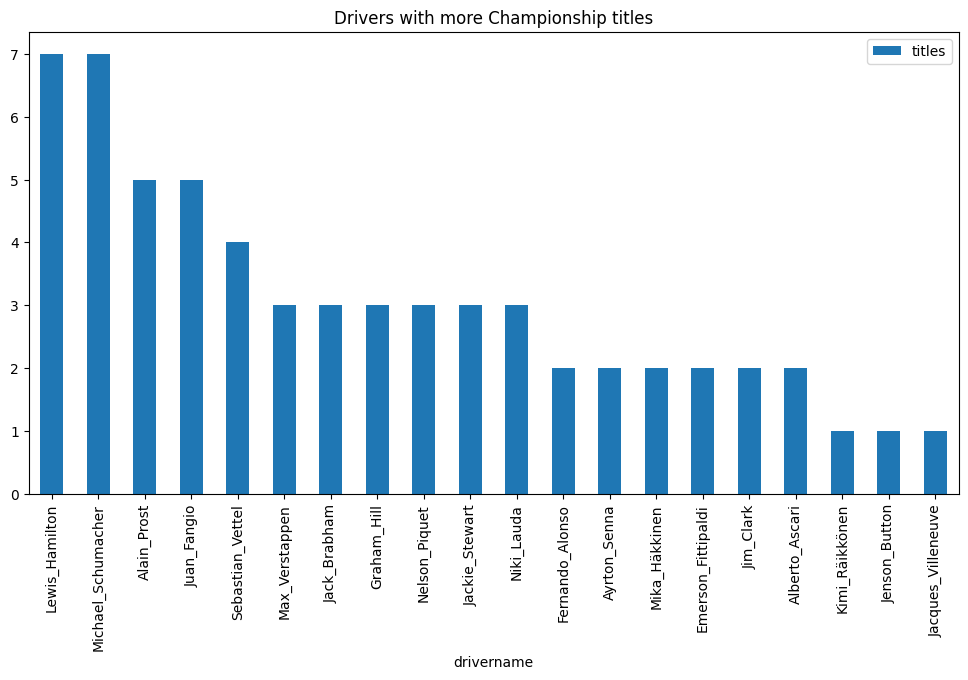

In [26]:
# Plot a bar chart to show the drivers with highest number of wins in the F1 championship over the years
champions.plot(kind = 'bar', x='drivername', y='titles', figsize=(12,6), title = f"Drivers with more Championship titles")

### Driver with most pole positions (grid = 1): Lewis Hamilton (103)

In [27]:
# Create a column named "driver_pole" to sum up the number of pole positions (grid) obtained by each driver

driver_pole = df_race_finished[df_race_finished['grid'] == 1].groupby('drivername')['grid'].sum().reset_index()

# Sort driver_pole in descending order

driver_pole = driver_pole.sort_values(by=['grid'], ascending=False)

# Get top 20 results based on total pole positions obtained by each driver

driver_pole = driver_pole[0:20]

<Axes: title={'center': 'Drivers with more pole positions (grid = 1)'}, xlabel='drivername'>

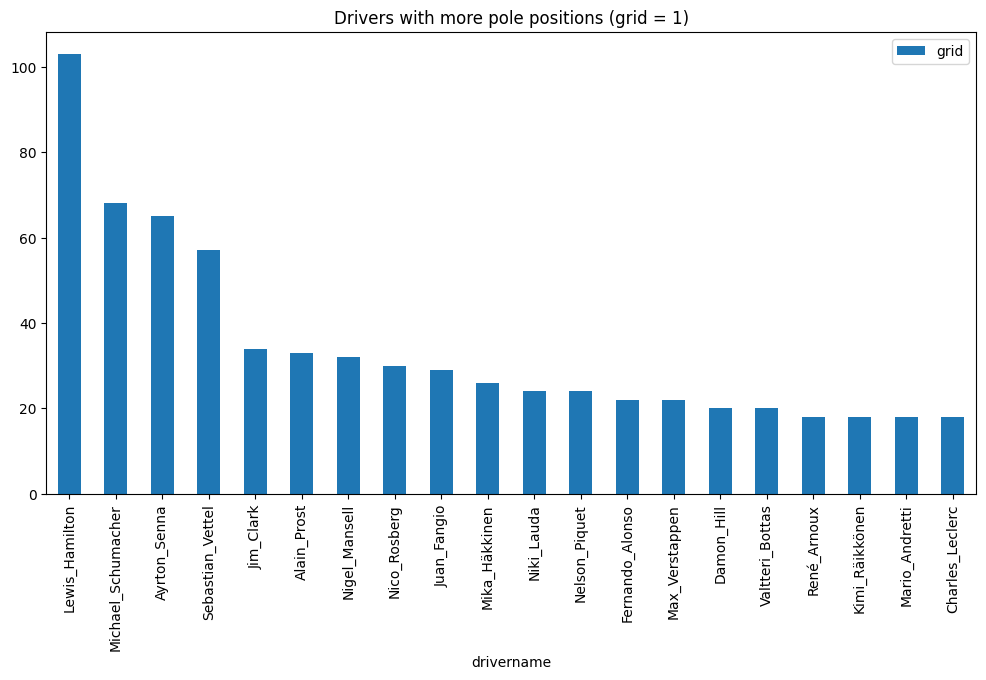

In [28]:
# Plot a bar chart to show the drivers with highest number of pole positions (grid) in the F1 championship over the years

driver_pole.plot(kind = 'bar', x='drivername', y='grid', figsize=(12,6), title = f"Drivers with more pole positions (grid = 1)")

### Driver with most numbers of fastest lap (rank = 1) : Lewis Hamilton (59)

In [29]:
# Convert the datatype of rank to integer 

df_race_finished['rank'] = pd.to_numeric(df_race_finished['rank'], errors='coerce')

# Subset the dataset by filtering for rank = 1 (fastest lap) and assign it to a new variable 'num_lap_rank'

num_lap_rank = df_race_finished[df_race_finished['rank'] == 1].groupby('drivername')['rank'].sum().reset_index()

# Sort num_lap_rank in descending order

num_lap_rank = num_lap_rank.sort_values(by=['rank'], ascending=False)

# Get top 20 results based on number of fastest lap obtained by each driver

num_lap_rank = num_lap_rank[0:20]

<Axes: title={'center': 'Drivers with most numbers of fastest lap (rank = 1)'}, xlabel='drivername'>

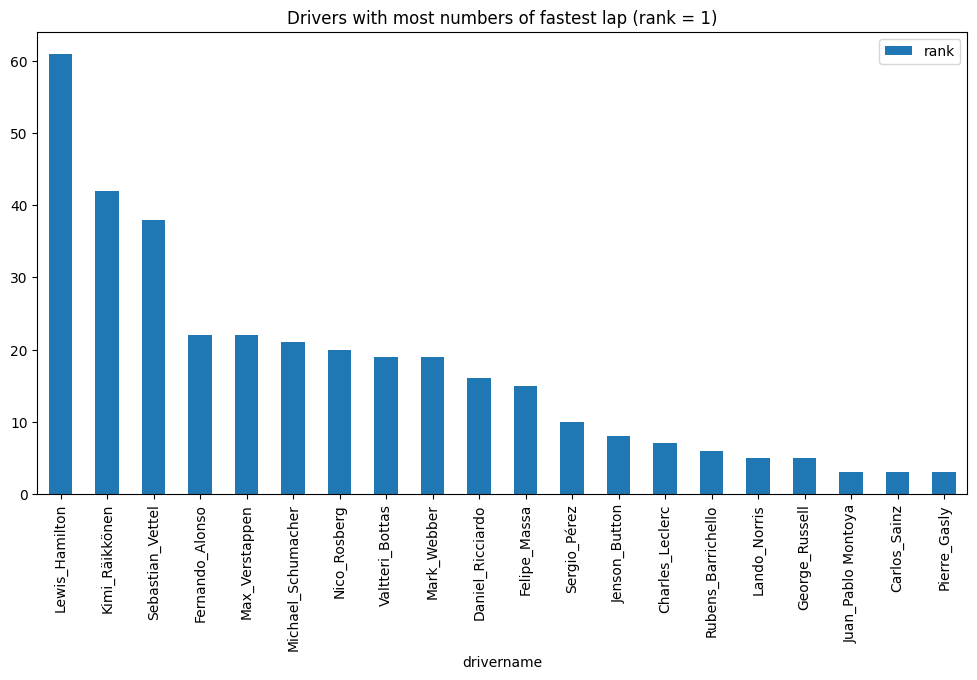

In [30]:
# Plot a bar chart to show the top 20 drivers with highest number of fastest lap in F1 championship over the years

num_lap_rank.plot(kind = 'bar', x='drivername', y='rank', figsize=(12,6), title = f"Drivers with most numbers of fastest lap (rank = 1)")

### Driver with most race wins (position = 1): Michael Schumacher (91)

In [31]:
# Subset the dataset by filtering for position = 1 (Wins) and assign it to a new variable 'num_wins'

num_wins = df_race_finished[(df_race_finished['position'] == '1')]

# Convert the datatype of position to integer 

num_wins['position'] = num_wins['position'].astype(int)

# Sum up the number of wins obtained by each driver

num_wins = num_wins.groupby('drivername')['position'].sum().reset_index()

# Sort num_wins in descending order

num_wins = num_wins.sort_values(by=['position'], ascending=False)

# Get top 20 results based on highest number of total points

num_wins = num_wins[0:20]

<Axes: title={'center': 'Drivers with more race wins (position = 1)'}, xlabel='drivername'>

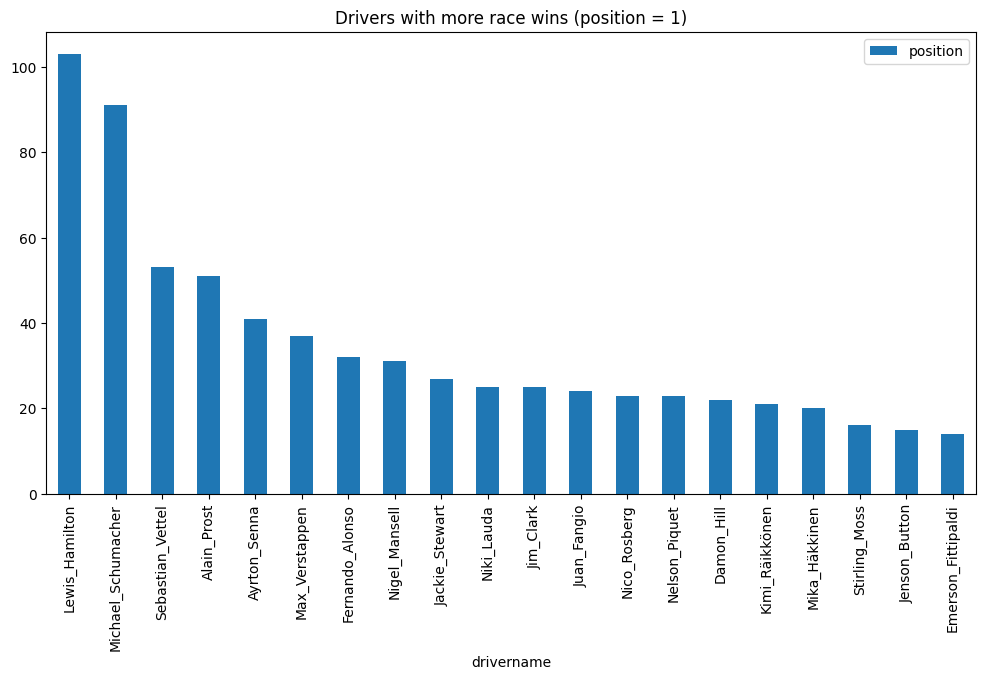

In [32]:
# Plot a bar chart to show the top 20 drivers with highest number of wins in F1 championship over the years

num_wins.plot(kind = 'bar', x='drivername', y='position', figsize=(12,6), title = f"Drivers with more race wins (position = 1)")

### Step 3: Data Cleansing  <a id="part8"></a>

In [33]:
# Note that there are some columns with '\\N' and NaN values that have caused their datatypes to be incorrect

df_race_finished

,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,year,round,location,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorname,status,race_age
0,1,1,10.0,58,39,2.0,218.300,Lewis_Hamilton,2008,1,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished,23
1,3,5,4.0,58,43,1.0,218.385,Heikki_Kovalainen,2008,1,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished,27
2,9,5,4.0,56,53,3.0,209.033,Lewis_Hamilton,2008,2,Malaysian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished,23
3,8,3,6.0,56,19,7.0,208.031,Heikki_Kovalainen,2008,2,Malaysian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished,27
4,5,5,4.0,57,49,1.0,209.062,Heikki_Kovalainen,2008,3,Bahrain Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren,Finished,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895,18,13,0.0,55,\N,NaN,\N,Jo_Siffert,1964,2,Dutch Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Brabham-BRM,+25 Laps,28
25896,10,13,0.0,55,\N,NaN,\N,Jo_Siffert,1965,6,Dutch Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Brabham-BRM,+25 Laps,29
25897,9,13,0.0,79,\N,NaN,\N,Jo_Bonnier,1962,8,United States Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Porsche,+21 Laps,32
25898,20,15,0.0,44,\N,NaN,\N,Horace_Gould,1954,5,British Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Cooper,+46 Laps,36


In [34]:
# drop the date and time columns that have no meaningful contributions to modelling

df_race_finished = df_race_finished.drop(columns = ['year', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', \
                                                    'quali_date', 'quali_time', 'sprint_date', 'sprint_time'])

In [35]:
# check the remaining columns with '\\N' values 

for col in df_race_finished.columns:
    print(col)
    display(df_race_finished[df_race_finished[col] == '\\N'])
    print("==================================================")
    print()

grid


,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,round,location,constructorname,status,race_age



position


,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,round,location,constructorname,status,race_age
9476,8,\N,0.0,56,55,5.0,221.316,Jenson_Button,1,Australian Grand Prix,BAR,+1 Lap,25
10979,6,\N,0.0,21,19,6.0,203.243,Heikki_Kovalainen,4,Spanish Grand Prix,McLaren,Accident,27
10980,2,\N,0.0,41,25,2.0,185.590,Fernando_Alonso,15,Japanese Grand Prix,McLaren,Accident,26
10981,7,\N,0.0,51,48,6.0,158.896,Heikki_Kovalainen,6,Monaco Grand Prix,McLaren,Accident,28
10983,12,\N,0.0,66,45,15.0,156.697,Stoffel_Vandoorne,6,Monaco Grand Prix,McLaren,Accident,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25876,25,\N,0.0,34,\N,NaN,\N,Rodger_Ward,2,Indianapolis 500,Bromme,Oil pipe,30
25878,6,\N,0.0,8,\N,NaN,\N,Helmut_Marko,6,French Grand Prix,BRM,Eye injury,29
25886,24,\N,0.0,50,\N,NaN,\N,Jo_Bonnier,12,United States Grand Prix,McLaren-Ford,Water pipe,40
25887,15,\N,0.0,2,\N,NaN,\N,Ludovico_Scarfiotti,1,South African Grand Prix,Cooper-BRM,Water pipe,35



points


,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,round,location,constructorname,status,race_age



laps


,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,round,location,constructorname,status,race_age



fastestLap


,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,round,location,constructorname,status,race_age
317,4,4,6.0,1,\N,0.0,\N,Daniel_Ricciardo,12,Belgian Grand Prix,McLaren,Finished,32
318,15,14,0.0,1,\N,0.0,\N,Lando_Norris,12,Belgian Grand Prix,McLaren,Finished,22
419,15,3,6.0,58,\N,NaN,\N,Kimi_Räikkönen,1,Australian Grand Prix,McLaren,Finished,24
420,11,1,10.0,58,\N,NaN,\N,David_Coulthard,1,Australian Grand Prix,McLaren,Finished,32
421,7,1,10.0,56,\N,NaN,\N,Kimi_Räikkönen,2,Malaysian Grand Prix,McLaren,Finished,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895,18,13,0.0,55,\N,NaN,\N,Jo_Siffert,2,Dutch Grand Prix,Brabham-BRM,+25 Laps,28
25896,10,13,0.0,55,\N,NaN,\N,Jo_Siffert,6,Dutch Grand Prix,Brabham-BRM,+25 Laps,29
25897,9,13,0.0,79,\N,NaN,\N,Jo_Bonnier,8,United States Grand Prix,Porsche,+21 Laps,32
25898,20,15,0.0,44,\N,NaN,\N,Horace_Gould,5,British Grand Prix,Cooper,+46 Laps,36



rank


,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,round,location,constructorname,status,race_age



fastestLapSpeed


,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,round,location,constructorname,status,race_age
317,4,4,6.0,1,\N,0.0,\N,Daniel_Ricciardo,12,Belgian Grand Prix,McLaren,Finished,32
318,15,14,0.0,1,\N,0.0,\N,Lando_Norris,12,Belgian Grand Prix,McLaren,Finished,22
419,15,3,6.0,58,\N,NaN,\N,Kimi_Räikkönen,1,Australian Grand Prix,McLaren,Finished,24
420,11,1,10.0,58,\N,NaN,\N,David_Coulthard,1,Australian Grand Prix,McLaren,Finished,32
421,7,1,10.0,56,\N,NaN,\N,Kimi_Räikkönen,2,Malaysian Grand Prix,McLaren,Finished,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895,18,13,0.0,55,\N,NaN,\N,Jo_Siffert,2,Dutch Grand Prix,Brabham-BRM,+25 Laps,28
25896,10,13,0.0,55,\N,NaN,\N,Jo_Siffert,6,Dutch Grand Prix,Brabham-BRM,+25 Laps,29
25897,9,13,0.0,79,\N,NaN,\N,Jo_Bonnier,8,United States Grand Prix,Porsche,+21 Laps,32
25898,20,15,0.0,44,\N,NaN,\N,Horace_Gould,5,British Grand Prix,Cooper,+46 Laps,36



drivername


,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,round,location,constructorname,status,race_age



round


,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,round,location,constructorname,status,race_age



location


,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,round,location,constructorname,status,race_age



constructorname


,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,round,location,constructorname,status,race_age



status


,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,round,location,constructorname,status,race_age



race_age


,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,drivername,round,location,constructorname,status,race_age


In [36]:
# replace the '\N' values with NaN values

df_race_finished.replace('\\N', np.NaN, inplace = True)

In [37]:
# convert the columns with the correct datatype 

df_race_finished['position'] = df_race_finished['position'].astype("Int64")
df_race_finished['fastestLap'] = df_race_finished['fastestLap'].astype("Int64")
df_race_finished['rank'] = df_race_finished['rank'].astype("Int64")
df_race_finished['fastestLapSpeed'] = df_race_finished['fastestLapSpeed'].astype(float)

In [38]:
df_race_finished.isnull().sum()

grid                   0
position           10859
points                 0
laps                   0
fastestLap         18462
rank               18249
fastestLapSpeed    18462
drivername             0
round                  0
location               0
constructorname        0
status                 0
race_age               0
dtype: int64

In [39]:
# check that the selected columns' datatypes are corrected
df_race_finished.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25900 entries, 0 to 25899
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grid             25900 non-null  int64  
 1   position         15041 non-null  Int64  
 2   points           25900 non-null  float64
 3   laps             25900 non-null  int64  
 4   fastestLap       7438 non-null   Int64  
 5   rank             7651 non-null   Int64  
 6   fastestLapSpeed  7438 non-null   float64
 7   drivername       25900 non-null  object 
 8   round            25900 non-null  int64  
 9   location         25900 non-null  object 
 10  constructorname  25900 non-null  object 
 11  status           25900 non-null  object 
 12  race_age         25900 non-null  int32  
dtypes: Int64(3), float64(2), int32(1), int64(3), object(4)
memory usage: 2.5+ MB


###  Descriptive statistics  <a id="part8.1"></a>

In [40]:
# Use descriptive statistics to check if there are anything amiss in each numerical column. 
# All variables seem ok at the moment (no negative values observed).

df_race_finished.describe()

,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,round,race_age
count,25900.000000,15041.0,25900.000000,25900.000000,7438.0,7651.0,7438.000000,25900.000000,25900.000000
mean,11.175985,7.946812,1.884442,45.986525,42.513041,10.408051,203.256095,8.371197,29.947259
std,7.241020,4.80739,4.182291,29.781758,16.800334,6.159578,21.403806,4.962127,5.281913
min,0.000000,1.0,0.000000,0.000000,2.0,0.0,89.540000,1.000000,18.000000
25%,5.000000,4.0,0.000000,22.000000,32.0,5.0,192.902500,4.000000,26.000000
50%,11.000000,7.0,0.000000,52.000000,45.0,10.0,204.316000,8.000000,29.000000
75%,17.000000,11.0,2.000000,66.000000,54.0,16.0,216.367750,12.000000,33.000000
max,34.000000,33.0,50.000000,200.000000,85.0,24.0,257.320000,22.000000,59.000000


###  Correlation  <a id="part8.2"></a>

#### grid, rank (Input variables) vs. points (Target variable) are highly negatively correlated to each other. Rank and grid, as well as laps and fastestLap are positively correlated to each other. 

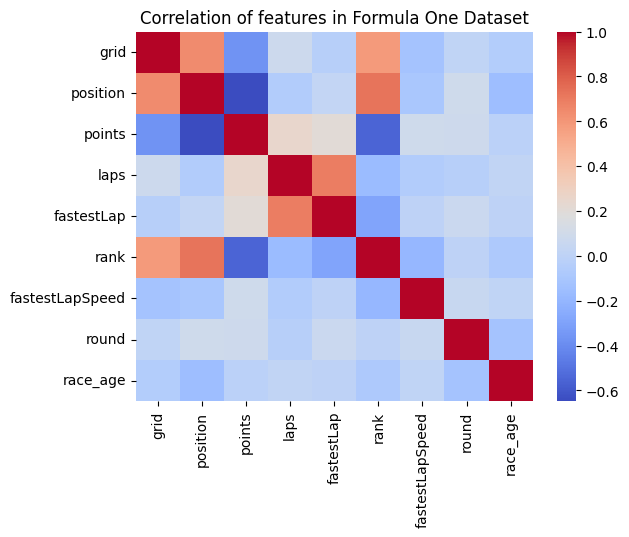

In [41]:
num_cols = [n for n in df_race_finished.columns if df_race_finished[n].dtypes != "O"]

# Use correlation to check if there are features that are highly correlated to each other

plt.title("Correlation of features in Formula One Dataset") # title name
sns.heatmap(df_race_finished[num_cols].corr(), cmap = 'coolwarm') # generate a heatmap using sns.heatmap(df_race_finished.corr(), cmap = 'coolwarm')

plt.show()

### Univariate analysis - numerical variables  <a id="part8.3"></a>

In [42]:
# find all numerical variables

num_cols = [c for c in df_race_finished.columns if df_race_finished[c].dtypes !='O']
df_race_finished[num_cols].head()

,grid,position,points,laps,fastestLap,rank,fastestLapSpeed,round,race_age
0,1,1,10.0,58,39,2,218.300,1,23
1,3,5,4.0,58,43,1,218.385,1,27
2,9,5,4.0,56,53,3,209.033,2,23
3,8,3,6.0,56,19,7,208.031,2,27
4,5,5,4.0,57,49,1,209.062,3,27


In [43]:
cat_cols = [c for c in df_race_finished.columns if df_race_finished[c].dtypes =='O']

In [44]:
df_race_finished[num_cols].columns

Index(['grid', 'position', 'points', 'laps', 'fastestLap', 'rank',
       'fastestLapSpeed', 'round', 'race_age'],
      dtype='object')

In [45]:
df_race_finished[cat_cols].columns

Index(['drivername', 'location', 'constructorname', 'status'], dtype='object')

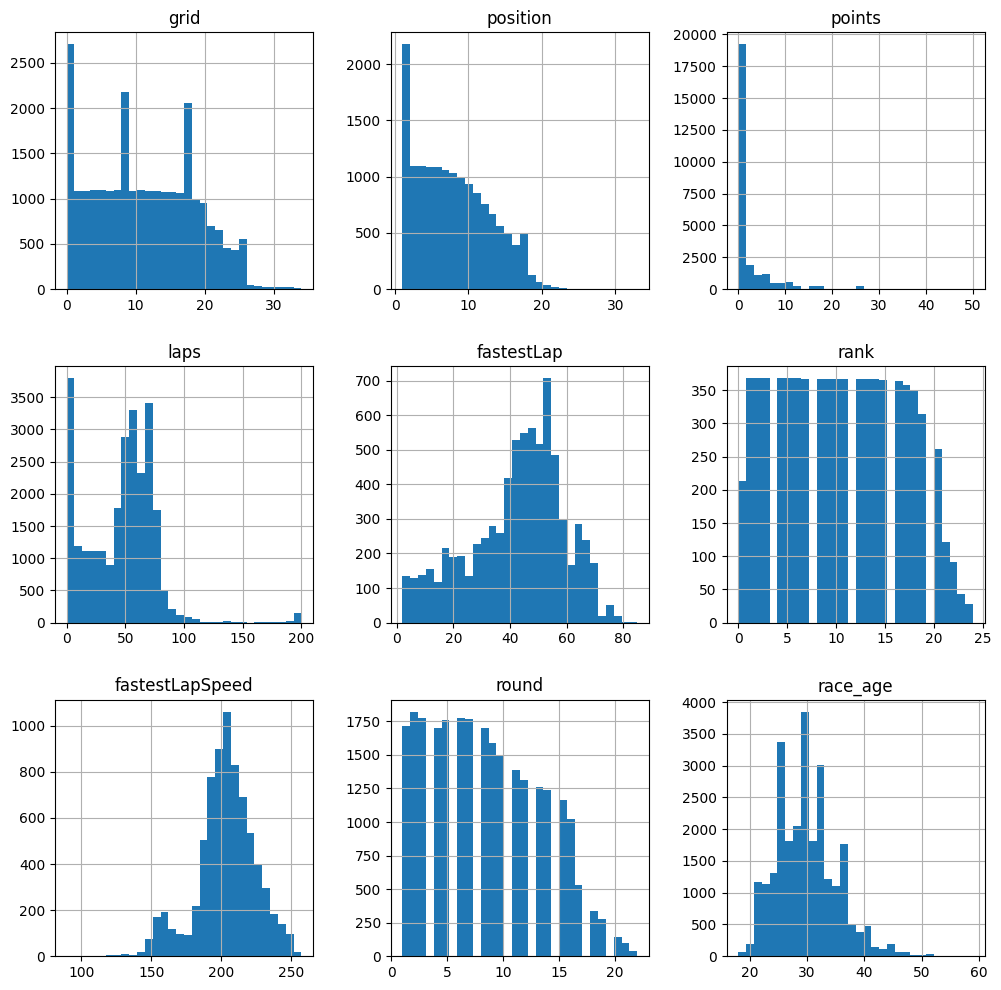

In [46]:
# plot histograms of the num variables

df_race_finished[num_cols].hist(bins=30, figsize=(12,12))
plt.show()

In [47]:
df_race_finished.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25900 entries, 0 to 25899
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grid             25900 non-null  int64  
 1   position         15041 non-null  Int64  
 2   points           25900 non-null  float64
 3   laps             25900 non-null  int64  
 4   fastestLap       7438 non-null   Int64  
 5   rank             7651 non-null   Int64  
 6   fastestLapSpeed  7438 non-null   float64
 7   drivername       25900 non-null  object 
 8   round            25900 non-null  int64  
 9   location         25900 non-null  object 
 10  constructorname  25900 non-null  object 
 11  status           25900 non-null  object 
 12  race_age         25900 non-null  int32  
dtypes: Int64(3), float64(2), int32(1), int64(3), object(4)
memory usage: 2.5+ MB


In [48]:
for col in df_race_finished.columns:
    print(col)
    print(df_race_finished[col].unique())
    print("===========================")
    print()

grid
[ 1  3  9  8  5  4  7 13 10  2 15  6 12 11 16 17 18 20 14 24 19 21 22 23
  0 25 27 26 33 28 32 31 30 29 34]

position
<IntegerArray>
[   1,    5,    3,    2,    8,    9,   10,    4,    7,   12,    6,   13,   11,
   14,   16,   15,   17,   18,   19,   20,   22,   21, <NA>,   26,   24,   23,
   30,   27,   28,   31,   29,   25,   32,   33]
Length: 34, dtype: Int64

points
[10.    4.    6.    8.    1.    0.    5.    2.    3.   15.   25.   18.
 12.   20.   16.   26.    7.    9.    4.5   1.5   0.5  36.   30.   13.
 11.   19.    8.14  6.14  8.5   2.5  24.   12.5  50.    7.5   6.5   3.14
  4.14  1.33  3.5 ]

laps
[ 58  56  57  66  76  70  60  67  44  53  61  71  65  78  73  59  31  55
  49  52  69  51  64  63   1  50  72  28  62  54  77  36  45  87  75  81
  79  14  80  43  82  68  40  29  32  85  95  38  83  47  84  96  90  12
  15  48 105 110 100  86  30  24  42  22 101  97  18  20  98  35 108 200
 138  74  39  89  13  37 107  27 109  23  99  21  17  19  34  41  46  94
  11 137 199   0

In [49]:
df_race_finished.to_csv("./processed_data/F1_race.csv", index=False)

## End of Notebook